In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q pyomo
from pyomo.environ import *

# installing qpsolvers from web
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp
# Install solver as well into collab session
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc

#code to invoke qp solver
#solve_qp(P, q, G, h, A, b, l, u, solver = "osqp")


Looking in indexes: https://pypi.gurobi.com


Q1 Part 2

 Solve the above formulation using the Pyomo/qpsolver framework and report your optimal solution.

In [2]:
interestrates  =pd.read_csv('Lab08_InterestRate.csv')
interestrates

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [3]:
ratio = interestrates['Ratio'].to_numpy()
ratio

array([0.3615, 0.282 , 0.301 , 0.3862, 0.3578, 0.4413, 0.6753, 0.6777,
       0.6585, 0.6702, 0.3289, 0.2473, 0.2762, 0.3222, 0.2792, 0.3609,
       0.6187, 0.6176, 0.6004, 0.6119])

In [4]:
rating = interestrates['Rating'].to_numpy()
rating

array([85.6, 91.9, 89.1, 90.4, 86.3, 74.7, 79.8, 74.3, 84.4, 84.1, 86.8,
       93.7, 92.3, 94. , 88.9, 74.3, 74. , 69.8, 81.6, 81. ])

In [5]:
actual = interestrates['Interest Rate'].to_numpy()
actual

array([0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507,
       0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504,
       0.0478, 0.0549, 0.0468, 0.0478])

In [6]:
n = len(actual)
n

20

In [7]:
A = np.zeros((n,3))
for i in range(n):
  A[i][0] = 1
  A[i][1] = ratio[i]
  A[i][2] = rating[i]


In [8]:
A

array([[ 1.    ,  0.3615, 85.6   ],
       [ 1.    ,  0.282 , 91.9   ],
       [ 1.    ,  0.301 , 89.1   ],
       [ 1.    ,  0.3862, 90.4   ],
       [ 1.    ,  0.3578, 86.3   ],
       [ 1.    ,  0.4413, 74.7   ],
       [ 1.    ,  0.6753, 79.8   ],
       [ 1.    ,  0.6777, 74.3   ],
       [ 1.    ,  0.6585, 84.4   ],
       [ 1.    ,  0.6702, 84.1   ],
       [ 1.    ,  0.3289, 86.8   ],
       [ 1.    ,  0.2473, 93.7   ],
       [ 1.    ,  0.2762, 92.3   ],
       [ 1.    ,  0.3222, 94.    ],
       [ 1.    ,  0.2792, 88.9   ],
       [ 1.    ,  0.3609, 74.3   ],
       [ 1.    ,  0.6187, 74.    ],
       [ 1.    ,  0.6176, 69.8   ],
       [ 1.    ,  0.6004, 81.6   ],
       [ 1.    ,  0.6119, 81.    ]])

In [9]:

#the P matrix in quadratic form
#the P = 2 A ^T  A

P = 2*np.matmul(A.transpose(), A)

In [10]:

#q = -2 A^T r
q= -2*np.matmul(A.transpose(), actual)

In [11]:
lower = np.array([0, -np.Inf, -np.Inf])

In [12]:
# lb

In [28]:
x = solve_qp(P, q, G = None, h = None, A = None, b =None, lb=lower, ub=None, solver = "osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


In [31]:
#objective cost
0.5*x@P@x + q@x + actual@actual

0.0001585296335953057

In [34]:
sum((A@x - actual)**2)

0.00015852963359525775

Q1 Part 3


Using Approach 1 (OP1)

In [14]:
model = ConcreteModel()
n = 20
model.z = Var(np.arange(n))
model.b= Var(np.arange(3))
model.obj = Objective(expr = sum(model.z[i] for i in range(n)), sense = minimize)
model.constraints = ConstraintList()
for i in range(n):
  model.constraints.add( expr = actual[i] - model.b[0] - model.b[1]*ratio[i] - model.b[2]*rating[i] <= model.z[i])
  model.constraints.add( expr = -actual[i] + model.b[0] + model.b[1]*ratio[i] + model.b[2]*rating[i] <= model.z[i])
  model.constraints.add(expr = model.z[i]>=0)
model.constraints.add(expr = model.b[0] >= 0)
model.pprint()

3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    z_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  

In [15]:
opt = SolverFactory("cbc")
results = opt.solve(model)

In [16]:
results

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.0379290902, 'Upper bound': 0.0379290902, 'Number of objectives': 1, 'Number of constraints': 61, 'Number of variables': 23, 'Number of nonzeros': 20, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 0.0, 'Wallclock time': 0.01, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': None, 'Number of created subproblems': None}, 'Black box': {'Number of iterations': 22}}, 'Error rc': 0, 'Time': 0.12129330635070801}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [17]:
for i in range(3):
  print(f"b{i}: ", model.b[i].value )

b0:  0.11547155
b1:  0.0093102734
b2:  -0.00093012282


In [18]:
model.obj()

0.0379290903

Approach no. 2 (OP2)

In [19]:
model2 = ConcreteModel()
n = 20
model2.x = Var(np.arange(n))
model2.y= Var(np.arange(n))
model2.b = Var(np.arange(3))
model2.obj = Objective(expr = sum(model2.x[i] + model2.y[i] for i in range(n)), sense = minimize)
model2.constraints = ConstraintList()
for i in range(n):
  model2.constraints.add( expr = actual[i] - model2.b[0] - model2.b[1]*ratio[i] - model2.b[2]*rating[i] == model2.x[i]- model2.y[i])
  model2.constraints.add(expr = model2.x[i]>=0)
  model2.constraints.add(expr = model2.y[i]>=0)
model2.constraints.add(expr = model2.b[0] >= 0)
model2.pprint()

4 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
    y_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

3 Var Declarations
    b : Size=3, Index=b

In [20]:
results2 = opt.solve(model2)

In [21]:
results2

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.0379290902, 'Upper bound': 0.0379290902, 'Number of objectives': 1, 'Number of constraints': 61, 'Number of variables': 43, 'Number of nonzeros': 40, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 0.0, 'Wallclock time': 0.01, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': None, 'Number of created subproblems': None}, 'Black box': {'Number of iterations': 20}}, 'Error rc': 0, 'Time': 0.07223320007324219}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [22]:
model2.obj()

0.0379290903

In [23]:
for i in range(20):
  print(f"x{i}: ", model2.x[i].value )
  print(f"y{i}: ", model2.y[i].value )

x0:  0.0023812986
y0:  0.0
x1:  0.0
y1:  0.0014187609
x2:  0.0
y2:  0.0
x3:  0.0
y3:  0.0018840756
x4:  0.0013668326
y4:  0.0
x5:  0.0
y5:  0.0
x6:  0.0
y6:  0.0054349776
x7:  0.0
y7:  0.0019729978
x8:  0.0
y8:  0.0
x9:  0.00021203295
y9:  0.0
x10:  0.0020009609
y10:  0.0
x11:  0.0
y11:  0.0032214733
x12:  0.0
y12:  0.0023927122
x13:  0.0
y13:  0.004939776
x14:  0.0004169394
y14:  0.0
x15:  0.00067649685
y15:  0.0
x16:  0.0
y16:  0.0046027285
x17:  0.0
y17:  0.001399003
x18:  0.001636583
y18:  0.0
x19:  0.0019714411
y19:  0.0


In [24]:
for i in range(3):
  print(f"x{i}: ", model2.b[i].value )

x0:  0.11547155
x1:  0.0093102734
x2:  -0.00093012282


Part 4: Plotting

([<matplotlib.axis.XTick at 0x787195372f50>,
 [Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

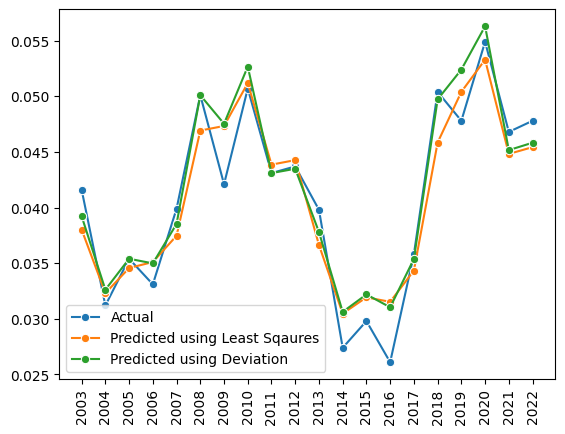

In [27]:
#predicted data for the least sqaures model and for the least deviation models

xfirstpart = np.array([ 0.09128332,  0.01686998, -0.00069351])
bdeviation = np.array([0.11547155, 0.0093102734, -0.00093012282])
rhat = np.matmul(A,xfirstpart)
rhat2 = np.matmul(A,bdeviation)
import matplotlib.pyplot as plt
import seaborn as sns
years = interestrates.Year.to_list()
sns.lineplot(x = years, y= actual,marker ='o', label = 'Actual')
sns.lineplot(x = years, y = rhat, marker ='o', label = 'Predicted using Least Sqaures')
sns.lineplot(x = years, y = rhat2, marker ='o', label = 'Predicted using Deviation')
plt.xticks(years, rotation = 90)